In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
source_name='NGC 2110'
ra=88.047400
dec=-7.456247
radius=10.
Tstart='2003-03-15T00:00:00'
Tstop='2018-03-15T00:00:00'
E1_keV=30.
E2_keV=100.
host='www.astro.unige.ch/cdci/astrooda/dispatch-data'
rebin=10 # minimal significance in energy bin, for spectral plotting

In [3]:
token=input() # token for restricted access server
cookies=dict(_oauth2_proxy=token)

In [4]:
#disp=DispatcherAPI(host=host+'/dispatch-data',instrument='mock',cookies=cookies,protocol='https')
disp=DispatcherAPI(host='www.astro.unige.ch/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')

In [7]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=1000'
    print(url+params)
    return requests.get(url+params,cookies=cookies).json()

In [9]:
#if token!='':
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2003-03-15T00:00:00/2018-03-15T00:00:00?&ra=88.0474&dec=-7.456247&radius=10.0&min_good_isgri=1000


In [10]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))



18
6


In [13]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=3.5,
                      product_type='Real')

048300050010.001,048300060010.001,048300070010.001,048300080010.001,048300160010.001,048300370010.001,048700080010.001,048700090010.001,048700100010.001,048700170010.001,048700180010.001,048700190010.001,048700580010.001,048700590010.001,048700600010.001,053000540010.001,053000550010.001,053000560010.001,053000630010.001,053000640010.001,053000660010.001,053200050010.001,053200060010.001,053200150010.001,053200360010.001,053200440010.001,053200450010.001,053200460010.001,053200470010.001,053200540010.001,053200550010.001,053200560010.001,053800040010.001,053800250010.001,053800330010.001,053800340010.001,053800350010.001,053800360010.001,053800430010.001,053800440010.001,053800450010.001,053800460010.001,053800540010.001,054300260010.001,054300340010.001,054300350010.001,054300360010.001,054300370010.001,054300430010.001,054300440010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 048300050010.001,048300060010.

In [14]:
data.dispatcher_catalog_1.table



meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str10,float64,float64,float64,int64,int64,int64,float64
3,Ark 120,4.453483581542969,79.04783630371094,-0.15016700327396393,-32768,2,0,0.0002800000074785203
4,H 0614+091,12.6614990234375,94.28777313232422,9.13561725616455,-32768,2,0,0.0002800000074785203
14,NGC 2110,14.64085865020752,88.04682922363281,-7.458226203918457,-32768,2,0,0.0002800000074785203


In [15]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n=='NEW_1'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)

nrows=len(data.dispatcher_catalog_1.table['src_names'])
print(nrows)
print(FLAG)

3
1


In [16]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row()
    data.dispatcher_catalog_1.table['src_names'][nrows]='3C 279'
    data.dispatcher_catalog_1.table['ra'][nrows]=ra
    data.dispatcher_catalog_1.table['dec'][nrows]=dec
    data.dispatcher_catalog_1.table['ISGRI_FLAG'][nrows]=2

data.dispatcher_catalog_1.table


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str10,float64,float64,float64,int64,int64,int64,float64
3,Ark 120,4.453483581542969,79.04783630371094,-0.15016700327396393,-32768,2,0,0.0002800000074785203
4,H 0614+091,12.6614990234375,94.28777313232422,9.13561725616455,-32768,2,0,0.0002800000074785203
14,NGC 2110,14.64085865020752,88.04682922363281,-7.458226203918457,-32768,2,0,0.0002800000074785203


In [17]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [37]:
spectrum_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        scw_list=scw_lists_osa10[i],
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat)
    spectrum_results.append(data)

0
048300050010.001,048300060010.001,048300070010.001,048300080010.001,048300160010.001,048300370010.001,048700080010.001,048700090010.001,048700100010.001,048700170010.001,048700180010.001,048700190010.001,048700580010.001,048700590010.001,048700600010.001,053000540010.001,053000550010.001,053000560010.001,053000630010.001,053000640010.001,053000660010.001,053200050010.001,053200060010.001,053200150010.001,053200360010.001,053200440010.001,053200450010.001,053200460010.001,053200470010.001,053200540010.001,053200550010.001,053200560010.001,053800040010.001,053800250010.001,053800330010.001,053800340010.001,053800350010.001,053800360010.001,053800430010.001,053800440010.001,053800450010.001,053800460010.001,053800540010.001,054300260010.001,054300340010.001,054300350010.001,054300360010.001,054300370010.001,054300430010.001,054300440010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 048300050010.001,04830006001



query done succesfully!
3
071800360010.001,071800370010.001,071800380010.001,071800390010.001,071800400010.001,071800410010.001,071800420010.001,071800430010.001,071800440010.001,071800450010.001,071800460010.001,071800470010.001,071800480010.001,071800490010.001,071800500010.001,071800510010.001,071800520010.001,071800530010.001,071800540010.001,071800550010.001,071800560010.001,071800570010.001,071800580010.001,071900120010.001,071900130010.001,071900140010.001,071900150010.001,071900160010.001,071900170010.001,071900180010.001,071900190010.001,071900200010.001,071900210010.001,071900220010.001,071900230010.001,071900240010.001,071900250010.001,071900260010.001,071900270010.001,071900280010.001,071900290010.001,071900300010.001,071900310010.001,071900320010.001,071900330010.001,071900340010.001,085400180010.001,085400190010.001,085400200010.001,085400210010.001,085400220010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch



query done succesfully!
6
097300930010.001,097300940010.001,097300950010.001,097300960010.001,097300970010.001,097300980010.001,097400030010.001,097400040010.001,097400050010.001,097400060010.001,097400070010.001,097400080010.001,097400090010.001,097400100010.001,097400110010.001,097400120010.001,097400510010.001,097400520010.001,097400530010.001,097400540010.001,097400550010.001,097400560010.001,097400570010.001,097400580010.001,097400590010.001,097400600010.001,097500230010.001,097500240010.001,097500250010.001,097500260010.001,097500270010.001,097500280010.001,097500290010.001,097500300010.001,097500310010.001,097500320010.001,097500370010.001,097500380010.001,097500390010.001,097500400010.001,097500410010.001,097500420010.001,097500430010.001,097500440010.001,097500450010.001,097500460010.001,097500850010.001,097500860010.001,097500870010.001,097500880010.001,097500890010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch



query done succesfully!
9
127500860010.001,127500870010.001,127500880010.001,127800630010.001,127800640010.001,127800650010.001,127800660010.001,127800830010.001,127800840010.001,127800850010.001,127800860010.001,127800870010.001,127800880010.001,127800890010.001,127800910010.001,127800920010.001,127900070010.001,127900280010.001,127900370010.001,127900380010.001,128100060010.001,128100070010.001,128100080010.001,128100090010.001,128100100010.001,128100110010.001,128100120010.001,128100130010.001,128100150010.001,128100160010.001,128100170010.001,128100180010.001,128100190010.001,128100200010.001,128100220010.001,128100290010.001,128100300010.001,128100310010.001,131700340010.001,131700430010.001,132600040010.001,132600050010.001,132600060010.001,132600070010.001,132600140010.001,132600150010.001,132600160010.001,132600250010.001,132600350010.001,132600360010.001,132900280010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch



query done succesfully!
12
144400490010.001,144400500010.001,144400510010.001,144400520010.001,144500050010.001,144500060010.001,144500070010.001,144500080010.001,144500090010.001,144500100010.001,144500140010.001,144500150010.001,144500160010.001,144500170010.001,144500180010.001,144500190010.001,144500200010.001,144500210010.001,144500250010.001,144500260010.001,144500270010.001,144500280010.001,144500290010.001,144500300010.001,144500310010.001,144500340010.001,144500350010.001,144500360010.001,144500370010.001,144500380010.001,144500390010.001,144500400010.001,144500460010.001,144500470010.001,144500480010.001,144500490010.001,144500500010.001,144500510010.001,144500520010.001,144500530010.001,144500570010.001,144500580010.001,144500590010.001,144500600010.001,144500610010.001,144500620010.001,144600060010.001,144600070010.001,144600080010.001,144600160010.001,144600170010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatc



query done succesfully!
15
150400170010.001,150400180010.001,150400190010.001,150400200010.001,150400210010.001,150400220010.001,150400280010.001,150400290010.001,150400300010.001,150400310010.001,150400370010.001,150400380010.001,150400390010.001,150400400010.001,150400410010.001,150400420010.001,150400430010.001,150400460010.001,150500020010.001,150500030010.001,150500040010.001,150500050010.001,150500060010.001,150500090010.001,150500100010.001,150500110010.001,150500120010.001,150500130010.001,150500140010.001,150500150010.001,150500160010.001,150500190010.001,150500200010.001,150500210010.001,150500220010.001,150500230010.001,150500240010.001,150500250010.001,150500310010.001,150500320010.001,150500330010.001,150500340010.001,150500350010.001,150500400010.001,150500410010.001,150500420010.001,150500430010.001,150500440010.001,150500450010.001,150500460010.001,150500490010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatc

In [38]:
d=spectrum_results[0]
for ID,s in enumerate(d._p_list):
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='isgri_spectrum'):
            ID_spec=ID
        if(s.meta_data['product']=='isgri_arf'):
            ID_arf=ID
        if(s.meta_data['product']=='isgri_rmf'):
            ID_rmf=ID

print(ID_spec, ID_arf, ID_rmf)

                                             

0 1 2


In [39]:
d=spectrum_results[0]
spec=d._p_list[ID_spec].data_unit[1].data
arf=d._p_list[ID_arf].data_unit[1].data
rmf=d._p_list[ID_rmf].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
print(len(rate))
for k in range(len(scw_lists_osa10)):
    d=spectrum_results[k]
    spec=d._p_list[ID_spec].data_unit[1].data
    arf=d._p_list[ID_arf].data_unit[1].data
    rmf=d._p_list[ID_rmf].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print(k,expos)
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos
    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos

for i in range(len(rate)):
    if err[i]>0.:
        rate[i]=rate[i]/err[i]
        err[i]=1./sqrt(err[i])
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1.))
print('Total exposure:',tot_expos)

62
0 112004.5226494027
1 112344.3872222909
2 108383.7624340841
3 117017.9974701607
4 113521.5145362888
5 93368.69953218164
6 63501.18021600888
7 67420.1570724878
8 119011.2654968308
9 121666.4534194255
10 122698.69051089
11 119348.3303021898
12 120935.6109287237
13 117136.5838095408
14 113907.2566316527
15 116192.4191349363
16 118113.9246785585
17 29161.22835377331
Total exposure: 1885733.9843994267


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [40]:
print(rate)
print(err)

[ 0.         -0.15915167  0.08857317  0.0945271   0.1843447   0.16634575
  0.10226104  0.11783997  0.11751505  0.11938324  0.11870214  0.11955211
  0.12674437  0.11210252  0.20766756  0.1706966   0.15989351  0.13994421
  0.24729975  0.18631852  0.16266203  0.15280716  0.13181196  0.11972892
  0.11552056  0.09868828  0.08860397  0.05510187  0.04555532  0.04229217
  0.04459608  0.03746208  0.0522574   0.05885531  0.06874491  0.06885643
  0.05817138  0.05074853  0.04499559  0.02988032  0.02509529  0.01951611
  0.02095621  0.01609074  0.00653444  0.00269071  0.00827121  0.00962252
  0.0069559   0.00092015  0.00376729  0.00529374  0.00440893  0.0031658
 -0.00113592  0.00158225 -0.00044812  0.00193185  0.00495183 -0.01182668
 -0.01098816  0.00158509]
[0.         0.18715522 0.08769385 0.04559904 0.02902163 0.02079424
 0.01564072 0.01248459 0.01051936 0.00914765 0.00819614 0.00738474
 0.00677413 0.00625047 0.00785186 0.0067851  0.00595143 0.00539134
 0.00675368 0.00598177 0.00560691 0.00543242

In [41]:
d._p_list[ID_spec].data_unit[1].data['RATE']=rate
d._p_list[ID_spec].data_unit[1].data['STAT_ERR']=err
d._p_list[ID_rmf].data_unit[2].data['MATRIX']=matrix
d._p_list[ID_arf].data_unit[1].data['SPECRESP']=specresp

In [45]:
name=source_name.replace(" ", "")
specname=name+'_spectrum_osa10.fits'
arfname=name+'_arf_osa10.fits.gz'
rmfname=name+'_rmf_osa10.fits.gz'
data._p_list[ID_spec].write_fits_file(specname)
data._p_list[ID_arf].write_fits_file(arfname)
data._p_list[ID_rmf].write_fits_file(rmfname)

In [46]:
hdul = fits.open(specname, mode='update')
hdr=hdul[1].header
hdr.set('EXPOSURE', tot_expos)
hdul.close()


In [63]:
!./spectrum_fit_osa10.sh $name $rebin


		XSPEC version: 12.9.0n
	Build Date/Time: Tue Nov  8 18:03:34 2016

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data NGC2110_spectrum_osa10.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: NGC2110_spectrum_osa10.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.067e+00 +/- 2.195e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-62
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 1.886e+06 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response NGC2110_rmf_osa10.fits.gz
Response successfully loaded.
XSPEC12>arf NGC2110_arf_osa10.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:     6 channels ignored from  source number 1

In [48]:
spectrum_results1=[]
for i in range(len(scw_lists_osa11)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        scw_list=scw_lists_osa11[i],
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat)
    spectrum_results1.append(data)

0
164400340010.001,164400550010.001,164400630010.001,164400640010.001,164400650010.001,164400660010.001,164800490010.001,164800500010.001,164800510010.001,164800520010.001,164800600010.001,166000130010.001,166400370010.001,166400450010.001,166400460010.001,166400470010.001,166400480010.001,166400490010.001,166400540010.001,166400550010.001,166400560010.001,166400570010.001,166400580010.001,166400590010.001,178100300010.001,178100390010.001,178100400010.001,178100490010.001,178100500010.001,178100590010.001,178100600010.001,179400320010.001,179400530010.001,179400620010.001,179400630010.001,179600140010.001,179600150010.001,179600160010.001,179600170010.001,179600250010.001,180100360010.001,180100560010.001,180100570010.001,180100580010.001,186800080010.001,186800090010.001,186800100010.001,186800110010.001,186800120010.001,186800130010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 164400340010.001,16440055001



query done succesfully!
3
187000120010.001,187000130010.001,187000140010.001,187000150010.001,187000160010.001,187000170010.001,187000180010.001,187000190010.001,187000200010.001,187000210010.001,187000220010.001,187000230010.001,187000240010.001,187000250010.001,187000260010.001,187000270010.001,187000280010.001,187000290010.001,187000300010.001,187000310010.001,187000320010.001,187000330010.001,187000340010.001,187000350010.001,187000360010.001,187000370010.001,187000380010.001,187000390010.001,187000400010.001,187000410010.001,187000420010.001,187000430010.001,187000440010.001,187000450010.001,187000460010.001,187000470010.001,187000490010.001,187000500010.001,187300060010.001,187300070010.001,187300080010.001,187300090010.001,187300100010.001,187300110010.001,187300120010.001,187300130010.001,187300140010.001,187300150010.001,187300160010.001,187300170010.001,187300180010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch

In [49]:
d=spectrum_results1[0]
for ID,s in enumerate(d._p_list):
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='isgri_spectrum'):
            ID_spec=ID
        if(s.meta_data['product']=='isgri_arf'):
            ID_arf=ID
        if(s.meta_data['product']=='isgri_rmf'):
            ID_rmf=ID

print(ID_spec, ID_arf, ID_rmf)



0 1 2


In [50]:
d=spectrum_results1[0]
spec=d._p_list[ID_spec].data_unit[1].data
arf=d._p_list[ID_arf].data_unit[1].data
rmf=d._p_list[ID_rmf].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
print(len(rate))
for k in range(len(scw_lists_osa11)):
    d=spectrum_results1[k]
    spec=d._p_list[ID_spec].data_unit[1].data
    arf=d._p_list[ID_arf].data_unit[1].data
    rmf=d._p_list[ID_rmf].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print(k,expos)
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos
    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos

for i in range(len(rate)):
    if err[i]>0.:
        rate[i]=rate[i]/err[i]
        err[i]=1./sqrt(err[i])
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1.))
print('Total exposure:',tot_expos)

256
0 100197.3615208966
1 109559.1910904937
2 107711.0993993773
3 108075.4632889396
4 112263.3479735824
5 48601.8842811551
Total exposure: 586408.3475544447


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [51]:
print(rate)
print(err)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  8.2908198e-02  9.1228321e-02
  6.2997162e-02  6.5195858e-02  7.6094896e-02  1.1093103e-01
  1.0500681e-01  7.6216325e-02  7.8063332e-02  6.5603115e-02
  8.4921062e-02  4.0861223e-02  5.4549210e-02  3.5464060e-02
  6.1298110e-02  6.4613976e-02  5.5163898e-02  4.5197167e-02
  2.6076674e-02  3.1074204e-02  3.9859558e-03  4.6189744e-02
  3.8611438e-02  3.8165800e-02  3.8992248e-02  4.2096447e-02
  3.8724501e-02  3.5624102e-02  2.8296622e-02  2.8861566e-02
  3.2661270e-02  3.8681727e-02  3.7155293e-02  1.1382341e-02
  2.5827948e-02  1.1502990e-02  2.2532094e-02  8.0387406e-03
  1.6670369e-02  1.8802265e-02  5.2734260e-03  1.2363695e-02
  1.5147414e-02  9.76365

In [52]:
d._p_list[ID_spec].data_unit[1].data['RATE']=rate
d._p_list[ID_spec].data_unit[1].data['STAT_ERR']=err
d._p_list[ID_rmf].data_unit[2].data['MATRIX']=matrix
d._p_list[ID_arf].data_unit[1].data['SPECRESP']=specresp

In [53]:
name=source_name.replace(" ", "")
specname=name+'_spectrum_osa11.fits'
arfname=name+'_arf_osa11.fits.gz'
rmfname=name+'_rmf_osa11.fits.gz'
data._p_list[ID_spec].write_fits_file(specname)
data._p_list[ID_arf].write_fits_file(arfname)
data._p_list[ID_rmf].write_fits_file(rmfname)

In [54]:
hdul = fits.open(specname, mode='update')
hdr=hdul[1].header
hdr.set('EXPOSURE', tot_expos)
hdul.close()

In [64]:
!./spectrum_fit_osa11.sh $name $rebin


		XSPEC version: 12.9.0n
	Build Date/Time: Tue Nov  8 18:03:34 2016

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data NGC2110_spectrum_osa11.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: NGC2110_spectrum_osa11.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.133e+00 +/- 7.652e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-256
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 5.864e+05 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response NGC2110_rmf_osa11.fits.gz
Response successfully loaded.
XSPEC12>arf NGC2110_arf_osa11.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:    24 channels ignored from  source number 

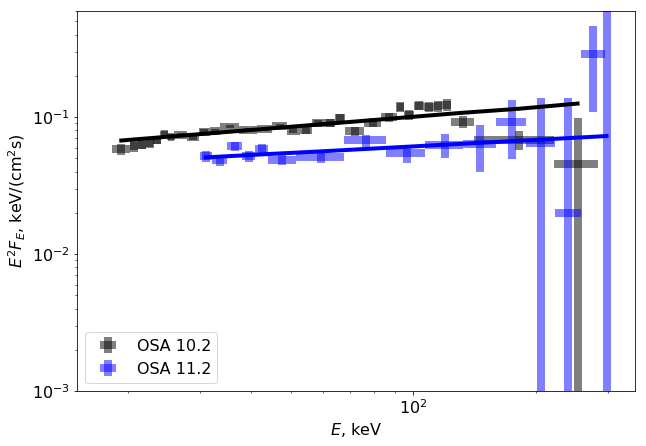

In [66]:
plt.figure(figsize=(10,7))

spectrum=np.genfromtxt(name+'_spectrum_osa10.txt',skip_header=3)
en=spectrum[:,0]
en_err=spectrum[:,1]
fl=spectrum[:,2]
fl_err=spectrum[:,3]
mo=spectrum[:,4]
plt.errorbar(en,fl,xerr=en_err,yerr=fl_err,linestyle='none',linewidth=8,color='black',alpha=0.5,label='OSA 10.2')
plt.plot(en,mo,color='black',linewidth=4)

spectrum=np.genfromtxt(name+'_spectrum_osa11.txt',skip_header=3)
en=spectrum[:,0]
en_err=spectrum[:,1]
fl=spectrum[:,2]
fl_err=spectrum[:,3]
mo=spectrum[:,4]
plt.errorbar(en,fl,xerr=en_err,yerr=fl_err,linestyle='none',linewidth=8,color='blue',alpha=0.5,label='OSA 11.2')
plt.plot(en,mo,color='blue',linewidth=4)


plt.tick_params(axis='both', which='major', labelsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-3,6.e-1)
plt.xlim(15,350)
plt.xlabel('$E$, keV',fontsize=16)
plt.ylabel('$E^2F_E$, keV/(cm$^2$s)',fontsize=16)
plt.legend(loc='lower left',fontsize=16)
plt.savefig(name+'_spectrum.pdf',format='pdf',dpi=100)




In [86]:
spectrum_pdf=name+'_spectrum.pdf'